#**Predicting Successfulness of Terrorist Attacks Using Decision Tree**

In [7]:
# Import Libraries
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns #remove?
from sklearn.model_selection import train_test_split
from sklearn import tree
from io import StringIO  
#import pydotplus
from sklearn.ensemble import RandomForestClassifier

In [9]:
input_file = "globalterrorismdb_shorter.csv"

df = pd.read_csv(input_file, header = 0,usecols=['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 'region', 'latitude', 'longitude','success', 'suicide','attacktype1','attacktype1_txt', 'targtype1', 'targtype1_txt', 'natlty1','natlty1_txt','weaptype1', 'weaptype1_txt' ,'nkill','multiple', 'individual', 'claimed','nkill','nkillter', 'nwound', 'nwoundte'],encoding='ISO-8859-1')
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            170350 non-null  int64  
 1   imonth           170350 non-null  int64  
 2   iday             170350 non-null  int64  
 3   extended         170350 non-null  int64  
 4   country          170350 non-null  int64  
 5   country_txt      170350 non-null  object 
 6   region           170350 non-null  int64  
 7   latitude         165744 non-null  float64
 8   longitude        165744 non-null  float64
 9   multiple         170350 non-null  int64  
 10  success          170350 non-null  int64  
 11  suicide          170350 non-null  int64  
 12  attacktype1      170350 non-null  int64  
 13  attacktype1_txt  170350 non-null  object 
 14  targtype1        170350 non-null  int64  
 15  targtype1_txt    170350 non-null  object 
 16  natlty1          168956 non-null  floa

In [10]:
df_WEur= df[df.region == 8] # A dataframe with region Western Europe
df_EEur= df[df.region ==9] # A dataframe with region Eastern Europe

euro_frames = [df_WEur, df_EEur]
df_Euro = pd.concat(euro_frames) # # A dataframe with whole Europe, both Western & Eastern  
df_Euro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21338 entries, 3 to 170268
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            21338 non-null  int64  
 1   imonth           21338 non-null  int64  
 2   iday             21338 non-null  int64  
 3   extended         21338 non-null  int64  
 4   country          21338 non-null  int64  
 5   country_txt      21338 non-null  object 
 6   region           21338 non-null  int64  
 7   latitude         21154 non-null  float64
 8   longitude        21154 non-null  float64
 9   multiple         21338 non-null  int64  
 10  success          21338 non-null  int64  
 11  suicide          21338 non-null  int64  
 12  attacktype1      21338 non-null  int64  
 13  attacktype1_txt  21338 non-null  object 
 14  targtype1        21338 non-null  int64  
 15  targtype1_txt    21338 non-null  object 
 16  natlty1          21113 non-null  float64
 17  natlty1_txt

In [11]:
df_Europe = df_Euro.drop([ 'region', 'claimed', 'nkillter', 'nwound','nwoundte'], axis=1)  
df_Europe.head()

,iyear,imonth,iday,extended,country,country_txt,latitude,longitude,multiple,success,...,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,individual,weaptype1,weaptype1_txt,nkill
3,1970,1,0,0,78,Greece,37.983773,23.728157,0,1,...,3,Bombing/Explosion,7,Government (Diplomatic),217.0,United States,0,6,Explosives/Bombs/Dynamite,NaN
12,1970,1,8,0,98,Italy,41.890520,12.494249,0,1,...,4,Hijacking,6,Airports & Aircraft,217.0,United States,0,5,Firearms,0.0
59,1970,2,10,0,362,West Germany (FRG),48.139126,11.580186,0,1,...,2,Armed Assault,6,Airports & Aircraft,97.0,Israel,0,5,Firearms,1.0
62,1970,2,13,0,362,West Germany (FRG),48.139126,11.580186,0,1,...,7,Facility/Infrastructure Attack,14,Private Citizens & Property,75.0,Germany,0,8,Incendiary,7.0
79,1970,2,21,0,362,West Germany (FRG),50.111445,8.680615,0,1,...,3,Bombing/Explosion,6,Airports & Aircraft,15.0,Austria,0,6,Explosives/Bombs/Dynamite,0.0


In [12]:
df_Europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21338 entries, 3 to 170268
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            21338 non-null  int64  
 1   imonth           21338 non-null  int64  
 2   iday             21338 non-null  int64  
 3   extended         21338 non-null  int64  
 4   country          21338 non-null  int64  
 5   country_txt      21338 non-null  object 
 6   latitude         21154 non-null  float64
 7   longitude        21154 non-null  float64
 8   multiple         21338 non-null  int64  
 9   success          21338 non-null  int64  
 10  suicide          21338 non-null  int64  
 11  attacktype1      21338 non-null  int64  
 12  attacktype1_txt  21338 non-null  object 
 13  targtype1        21338 non-null  int64  
 14  targtype1_txt    21338 non-null  object 
 15  natlty1          21113 non-null  float64
 16  natlty1_txt      21113 non-null  object 
 17  individual 

In [13]:
df_Europe.describe() 

,iyear,imonth,iday,extended,country,latitude,longitude,multiple,success,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill
count,21338.000000,21338.000000,21338.000000,21338.000000,21338.000000,21154.000000,21154.000000,21338.000000,21338.000000,21338.000000,21338.000000,21338.000000,21113.000000,21338.000000,21338.000000,20258.000000
mean,1992.940575,6.430078,15.340941,0.016075,260.284516,47.004651,10.921231,0.122458,0.856125,0.004968,3.300684,6.858609,167.954530,0.004452,6.471366,0.686445
std,13.505148,3.425984,8.848828,0.125765,219.288339,5.812682,17.854881,0.327821,0.350971,0.070308,1.949289,6.274039,90.410236,0.066577,1.847327,5.442190
min,1970.000000,0.000000,0.000000,0.000000,5.000000,27.793520,-27.220577,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,1981.000000,3.000000,8.000000,0.000000,78.000000,42.672479,-3.700345,0.000000,1.000000,0.000000,2.000000,2.000000,97.000000,0.000000,6.000000,0.000000
50%,1991.000000,6.000000,15.000000,0.000000,185.000000,45.463681,7.686619,0.000000,1.000000,0.000000,3.000000,4.000000,185.000000,0.000000,6.000000,0.000000
75%,2004.000000,9.000000,23.000000,0.000000,499.000000,53.383067,22.944616,0.000000,1.000000,0.000000,3.000000,14.000000,216.000000,0.000000,6.000000,1.000000
max,2016.000000,12.000000,31.000000,1.000000,1003.000000,74.633553,158.383333,1.000000,1.000000,1.000000,9.000000,22.000000,1003.000000,1.000000,13.000000,344.000000


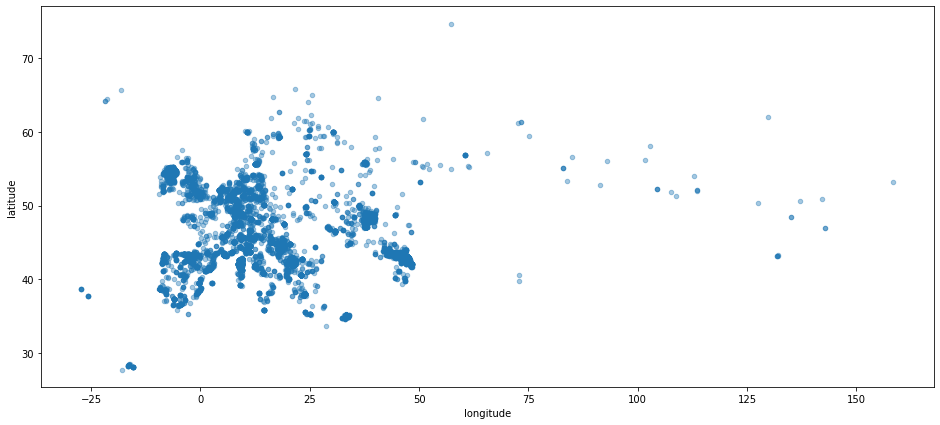

In [14]:
df_Europe.plot(kind= 'scatter', x='longitude', y='latitude', alpha=0.4, figsize=(16,7))
plt.show()

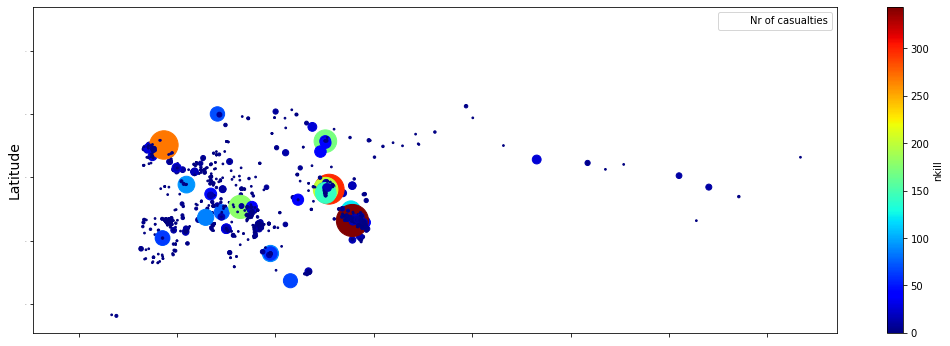

In [15]:
df_Europe.plot(kind= 'scatter', x='longitude', y='latitude', alpha=1.0,  figsize=(18,6),  
               s=df_Europe['nkill']*3, label= 'Nr of casualties', fontsize=1, c='nkill', cmap=plt.get_cmap("jet"), colorbar=True)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

In [16]:
df_Europe['nkill'].fillna(0.686445, inplace=True)
df_Europe['latitude'].fillna(47.004651, inplace=True)
df_Europe['longitude'].fillna(10.921231, inplace=True)
df_Europe['natlty1'].fillna(167.954530, inplace=True)

df_Europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21338 entries, 3 to 170268
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            21338 non-null  int64  
 1   imonth           21338 non-null  int64  
 2   iday             21338 non-null  int64  
 3   extended         21338 non-null  int64  
 4   country          21338 non-null  int64  
 5   country_txt      21338 non-null  object 
 6   latitude         21338 non-null  float64
 7   longitude        21338 non-null  float64
 8   multiple         21338 non-null  int64  
 9   success          21338 non-null  int64  
 10  suicide          21338 non-null  int64  
 11  attacktype1      21338 non-null  int64  
 12  attacktype1_txt  21338 non-null  object 
 13  targtype1        21338 non-null  int64  
 14  targtype1_txt    21338 non-null  object 
 15  natlty1          21338 non-null  float64
 16  natlty1_txt      21113 non-null  object 
 17  individual 

In [26]:
terror_peryear = np.asarray(df_Europe.groupby('iyear').iyear.count())
successes_peryear = np.asarray(df_Europe.groupby('iyear').success.sum())

terror_years = np.arange(1970, 2016)

trace1 = go.Bar(x = terror_years, y = terror_peryear, name = 'Nr of terrorist attacks',
         width = 3)

trace2 = go.Scatter(x = terror_years, y = successes_peryear, name = 'Nr of succesful terrorist attacks',
         line = dict(color = ('rgb(205, 12, 24)'), width = 5,))

layout = go.Layout(title = 'Terrorist Attacks by Year in Europe (1970-2016)', legend=dict(orientation="h"),
         barmode = 'group')

figure = dict(data = [trace1,trace2], layout = layout)
iplot(figure)

In [27]:
attacks_per_country = (df_Europe.groupby('country_txt').country_txt.count()) 
successes_per_country = (df_Europe.groupby('country_txt').success.sum()) 

trace1 = go.Bar(y=['Ireland','West Germany (FRG)','Germany','Greece','Italy','Ukraine','Russia','France','Spain','United Kingdom'],
    x=[290,541,703,1231,1556,1650,2158,2642,3245,5098],
    name='Nr of terrorist attacks per country', orientation = 'h')

trace2 = go.Bar(y=['Ireland','West Germany (FRG)','Germany','Greece','Italy','Ukraine','Russia','France','Spain','United Kingdom'],
    x=[135,465,633,1092,1384,1479,1780,2441,2814,4107],
    name='Nr of succesful terrorist attacks per country', orientation = 'h',
    marker = dict(color = 'rgba(128,128,0, 0.4)', line = dict(color = 'rgba(246, 78, 139, 0.2)',width = 0.5)))

data = [trace2,trace1]
layout = go.Layout(
    legend=dict(x=0.5, y=0.5), # placing legend in the middle
    title = 'Terrorist attacks in Europe 1970-2016 <br>by Country  - TOP 10', barmode='group',
    bargap=0.1, 
    autosize=False,
    width=1000,
    height=1000)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [28]:
trace1 = go.Bar(
    y=['Andorra','Vatican City','Iceland','Montenegro','Romania','Slovenia','Lithuania','Czechoslovakia',
       'Serbia','Serbia-Montenegro','Belarus','Estonia','Latvia','Luxembourg','Finland','Norway','Slovak Republic',
       'Malta','Moldova','Czech Republic','Poland','East Germany (GDR)','Denmark','Hungary','Bulgaria','Croatia',
       'Soviet Union','Albania','Switzerland','Austria','Macedonia','Sweden','Netherlands','Cyprus','Portugal',
       'Belgium','Bosnia-Herzegovina','Kosovo','Yugoslavia'],
    x=[1,1,4,5,6,6,8,10,11,11,13,16,16,16,18,18,18,20,21,29,36,38,41,46,52,57,78,79,108,109,117,118,128,132,139,148,159,188,203],
    name='Nr of terrorist attacks per country',
    orientation = 'h',
    marker = dict(
        color = 'rgba(255,0,0, 0.6)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 1)))

trace2 = go.Bar(
    y=['Andorra','Vatican City','Iceland','Montenegro','Romania','Slovenia','Lithuania','Czechoslovakia',
       'Serbia','Serbia-Montenegro','Belarus','Estonia','Latvia','Luxembourg','Finland','Norway','Slovak Republic',
       'Malta','Moldova','Czech Republic','Poland','East Germany (GDR)','Denmark','Hungary','Bulgaria','Croatia',
       'Soviet Union','Albania','Switzerland','Austria','Macedonia','Sweden','Netherlands','Cyprus','Portugal',
       'Belgium','Bosnia-Herzegovina','Kosovo','Yugoslavia'],
    x=[1,0,4,5,4,6,7,7,10,10,13,16,12,14,17,16,15,19,18,20,31,35,35,40,46,55,67,63,90,87,106,104,106,112,129,123,151,165,179],
    name='Nr of succesful terrorist attacks per country',
    orientation = 'h',
    marker = dict(
        color = 'rgba(128,128,0, 0.4)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 0.5)))

data = [trace2, trace1]
layout = go.Layout(
    legend=dict(x=0.5, y=0.5), # placing legend in the middle
    title = 'Terrorist attacks in Europe 1970-2016 <br>by Country outside the Top 10',
    barmode='group',
    bargap=0.1,
    #bargroupgap=0.1,
    autosize=False,
    width=900,
    height=1500,
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [29]:
attacks_per_type = (df_Europe.groupby('attacktype1_txt').attacktype1_txt.count())
successes_per_type = (df_Europe.groupby('attacktype1_txt').success.sum())

trace2 = go.Bar(
    y=['Hijacking','Hostage Taking (Barricade Incident)','Unarmed Assault','Unknown','Hostage Taking (Kidnapping)','Facility/Infrastructure Attack','Armed Assault','Assassination','Bombing/Explosion'],
    x=[89,106,183,373,485,2752,2911,3295,11144],
    name='Nr of terrorist attacks',
    orientation = 'h',
    marker = dict(
        color = 'rgba(128,0,0, 0.8)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 1)))

trace1 = go.Bar(
    y=['Hijacking','Hostage Taking (Barricade Incident)','Unarmed Assault','Unknown','Hostage Taking (Kidnapping)','Facility/Infrastructure Attack','Armed Assault','Assassination','Bombing/Explosion'],
    x=[76,105,149,333,457,2530,2637,2588,9393],
    name='Nr of succesful terrorist attacks',
    orientation = 'h',
    marker = dict(
        color = 'rgba(128,128,0, 0.4)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 0.5)))

data = [trace1, trace2]
layout = go.Layout(
    legend=dict(x=0.5, y=0.5), # placing legend in the middle
    title = 'Terrorist attacks in Europe 1970-2016 <br>by Type',
    barmode='group',
    bargap=0.1,
    bargroupgap=0,
    autosize=False,
    width=1000,
    height=500,
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [30]:
df_Europe.corr()

,iyear,imonth,iday,extended,country,latitude,longitude,multiple,success,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill
iyear,1.000000,0.002778,0.015311,0.043746,-0.128478,-0.038912,0.542099,0.158517,-0.105931,0.078051,0.133067,0.097937,0.059402,0.080305,0.029032,0.023694
imonth,0.002778,1.000000,0.015381,-0.009084,-0.003485,0.008979,0.023277,-0.038132,0.003053,0.017786,-0.018782,-0.001880,0.016235,-0.007573,-0.013179,0.018142
iday,0.015311,0.015381,1.000000,0.004635,0.015010,0.021356,0.007043,-0.037287,0.000780,-0.000689,-0.018018,0.009205,0.026344,0.009118,0.000845,-0.002926
extended,0.043746,-0.009084,0.004635,1.000000,-0.039872,-0.018620,0.094192,-0.030696,0.043904,-0.003731,0.136090,-0.002465,0.007664,-0.002950,0.193116,0.058453
country,-0.128478,-0.003485,0.015010,-0.039872,1.000000,0.643017,-0.406630,-0.105403,-0.074921,-0.027648,-0.143400,0.091323,0.522905,-0.019027,-0.116328,0.008163
latitude,-0.038912,0.008979,0.021356,-0.018620,0.643017,1.000000,-0.322631,-0.103696,-0.076818,-0.012183,-0.011589,0.135340,0.299297,0.026133,-0.005765,0.016243
longitude,0.542099,0.023277,0.007043,0.094192,-0.406630,-0.322631,1.000000,0.050185,0.036871,0.104338,0.037796,-0.007547,-0.076771,-0.007836,0.000113,0.068080
multiple,0.158517,-0.038132,-0.037287,-0.030696,-0.105403,-0.103696,0.050185,1.000000,0.035416,0.028507,0.112456,-0.023733,-0.068072,-0.009950,0.063098,-0.002990
success,-0.105931,0.003053,0.000780,0.043904,-0.074921,-0.076818,0.036871,0.035416,1.000000,0.011872,0.083171,-0.059766,-0.039017,-0.004677,0.037812,0.044044
suicide,0.078051,0.017786,-0.000689,-0.003731,-0.027648,-0.012183,0.104338,0.028507,0.011872,1.000000,-0.013293,0.006905,-0.006851,0.025312,-0.017669,0.162195


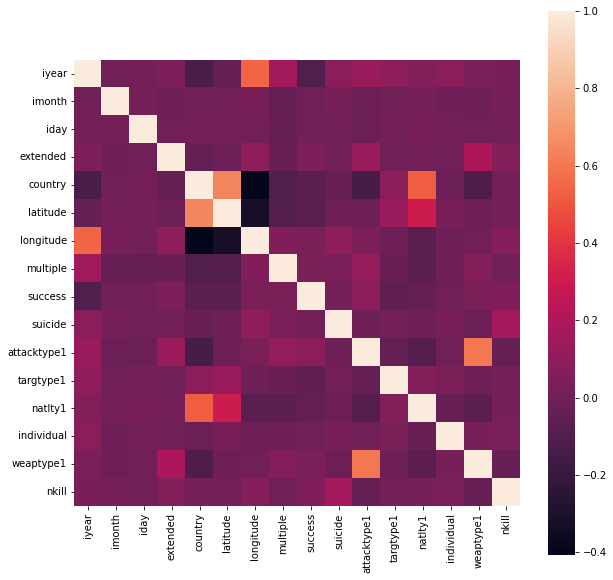

In [31]:
corrmat = df_Europe.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

In [32]:
#from sklearn.model_selection import train_test_split
X = df_Europe.drop(['iyear', 'success','country', 'country_txt', 'attacktype1_txt','targtype1_txt','natlty1', 'natlty1_txt', 'weaptype1_txt'], axis=1)
y = df_Europe['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
features = [ 'imonth', 'iday', 'extended',  'latitude', 'longitude', 'multiple','suicide','attacktype1',
            'targtype1', 'individual', 'weaptype1', 'nkill']

In [34]:
y = df_Europe['success'] #this is what we're trying to predict!
X = df_Europe[features]
dtc = tree.DecisionTreeClassifier(max_depth=3) 
dtc = dtc.fit(X_train,y_train)


In [35]:
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.83      0.19      0.31       588
           1       0.89      0.99      0.94      3680

    accuracy                           0.88      4268
   macro avg       0.86      0.59      0.62      4268
weighted avg       0.88      0.88      0.85      4268



In [36]:
print(confusion_matrix(y_test,dtc_pred))

[[ 113  475]
 [  23 3657]]


In [37]:
y = df_Europe['success'] 
X = df_Europe[features]
dtc = tree.DecisionTreeClassifier() 
dtc = dtc.fit(X_train,y_train)

In [38]:
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.43      0.49      0.46       588
           1       0.92      0.90      0.91      3680

    accuracy                           0.84      4268
   macro avg       0.67      0.69      0.68      4268
weighted avg       0.85      0.84      0.85      4268



In [39]:
print(confusion_matrix(y_test,dtc_pred))

[[ 290  298]
 [ 381 3299]]


In [40]:
rfc = RandomForestClassifier(n_estimators=400) 
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [41]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.73      0.42      0.53       588
           1       0.91      0.97      0.94      3680

    accuracy                           0.90      4268
   macro avg       0.82      0.70      0.74      4268
weighted avg       0.89      0.90      0.89      4268



In [42]:
print(confusion_matrix(y_test,rfc_pred))

[[ 248  340]
 [  92 3588]]


In [43]:
for name, score in zip(X_train[features], rfc.feature_importances_):
    print(name, score)

imonth 0.11377005640035505
iday 0.1673225205511836
extended 0.0024173789057100824
latitude 0.17353998770740095
longitude 0.18298228236438063
multiple 0.011748727800859332
suicide 0.0011825303463408898
attacktype1 0.10525050688710455
targtype1 0.11015961032303133
individual 0.00202400601974177
weaptype1 0.041775786567352646
nkill 0.08782660612653921


In [44]:
data = go.Bar(
    y=['suicide', 'individual', 'extended', 'multiple', 'weaptype1', 'nkill', 'attacktype1','targtype1', 
       'imonth',  'iday', 'latitude',  'longitude'],
    x=[0.001182,0.002047,0.002392,0.011422,0.041777,0.085776,0.107362,0.109867,0.113829,0.167432,0.173583,0.18333],   
    orientation = 'h',
    marker = dict(color = 'rgba(255,0,0, 0.6)', line = dict(width = 0.5)))

data = [data]
layout = go.Layout(title = 'Relative Importance of the Features in the Random Forest',
    barmode='group', bargap=0.1, width=800,height=500,)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [45]:
succeed_or_fail = RandomForestClassifier(n_estimators=400) 
succeed_or_fail = rfc.fit(X, y) #clf

month = 12           # in which month would the attack take place
day = 23             # on which day of the month would the attack take place
extended = 0         # 1=yes, 0=no
latitude = 48.8566
longitude = 2.3522
multiple = 0         # attack is part of a multiple incident (1), or not (0)
suicide = 0          # suicide attack (1) or not (0)
attackType = 3       # 9 categories
targetType = 7       # 22 categories
individual = 0       # known group/organization (1) or not (0)
weaponType = 6       # 13 categories
nkill = 0            # number of total casualties from the attack

outcome = (succeed_or_fail.predict([[(month),(day),(extended),(latitude),(longitude),(multiple),(suicide),(attackType),(targetType),(individual),(weaponType),(nkill)]])) 
if outcome == 1:
    print(outcome)
    print("The attack based on these features would be succesful.")
elif outcome == 0:
    print(outcome)
    print("The attack based on these features would NOT be succesful.")

[1]
The attack based on these features would be succesful.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

